## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
%matplotlib inline

In [3]:
# Display mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
capomulin_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
capomulin_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice. nunique for a count of field, unique for the entire list of field
no_mice = capomulin_study['Mouse ID'].nunique()
no_mice

249

In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
# finding the ID for mice that have duplicate time points
id_mice = capomulin_study.loc[capomulin_study.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
id_mice


array(['g989'], dtype=object)

In [8]:
# Optional: Display all the data for the duplicate mouse ID. 
capomulin_study.loc[capomulin_study['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
#cl_capomulin_study = capomulin_study.drop_duplicates(subset=None)
cl_capomulin_study = capomulin_study[capomulin_study['Mouse ID'].isin(id_mice)==False]

In [10]:
# Checking the number of mice in the clean DataFrame.
cl_no_mice = cl_capomulin_study['Mouse ID'].nunique()
cl_no_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# create the statistics for table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe
tot_mean = cl_capomulin_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tot_median = cl_capomulin_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tot_var = cl_capomulin_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tot_std = cl_capomulin_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tot_sem = cl_capomulin_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# create df by putting them together 
tot_df = pd.DataFrame({'Mean' :tot_mean,
                      'Median' :tot_median,
                      'Variance' :tot_var,
                      'Standard Deviation' :tot_std,
                      'SEM' :tot_sem})
tot_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cl_capomulin_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

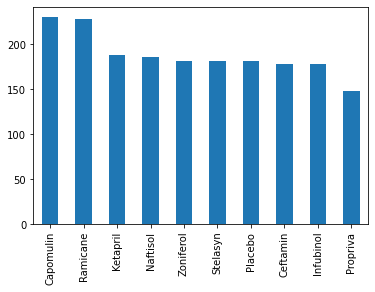

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#.plot 
counts_drug = cl_capomulin_study['Drug Regimen'].value_counts()
counts_drug.plot(kind='bar')

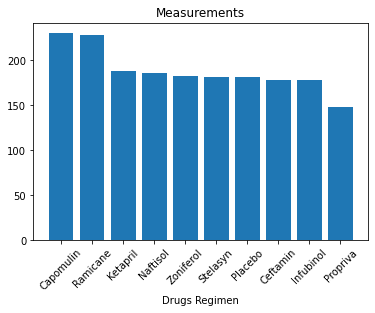

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.
plt.bar(counts_drug.index.values,counts_drug.values)
plt.xticks(rotation=45)
plt.title("Measurements")
plt.xlabel("Drugs Regimen")
plt.show()


<AxesSubplot:ylabel='Sex'>

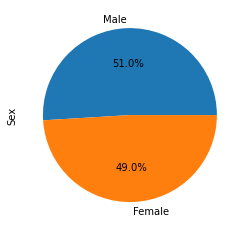

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts_sex = cl_capomulin_study['Sex'].value_counts()
counts_sex.plot(kind='pie',autopct="%1.1f%%")

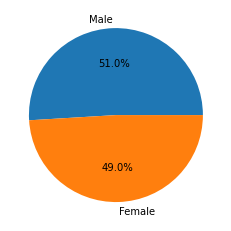

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#counts_sex

plt.pie(counts_sex.values,labels=counts_sex.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cl_capomulin_study.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_maxtimepoint = pd.merge(max_timepoint, cl_capomulin_study, on=['Mouse ID', 'Timepoint'], how="left")
study_maxtimepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
tumor_volbydrug = study_maxtimepoint.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
tumor_volbydrug

Drug Regimen
Capomulin     916.689193
Ceftamin     1443.849421
Infubinol    1454.456145
Ketapril     1570.154786
Naftisol     1530.143925
Placebo      1512.710359
Propriva     1355.853211
Ramicane      904.784761
Stelasyn     1464.040958
Zoniferol    1479.531445
Name: Tumor Volume (mm3), dtype: float64

In [22]:
drugs = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
tumors = [916.68, 904.78, 1454.45, 1443.84]
drug_tumor_df = pd.DataFrame(tumors, drugs)
drug_tumor_df

,0
Capomulin,916.68
Ramicane,904.78
Infubinol,1454.45
Ceftamin,1443.84


In [32]:
# Put treatments into a list for a for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

for drug in drugs:
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vol = study_maxtimepoint.loc[study_maxtimepoint['Drug Regimen'] == drug, 'Tumor Volume (mm3)']    
    # add subset 
    tumorvol.append(drug_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"The lower quartile of {drug} is: {lowerq}\n"
          f"The upper quartile of {drug} is: {upperq}\n"
            f"The interquartile range of {drug} is: {iqr}\n"
               f"The the median of {drug} is: {quartiles[0.5]}\n"
                 f"Values below {lower_bound} could be outliers.\n"
                   f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile

In [33]:
drugs

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [34]:
tumorvol

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

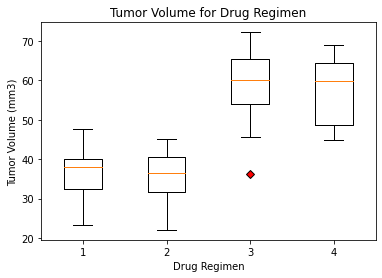

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Tumor Volume for Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
red_diamond = dict(markerfacecolor='r', marker='D')
ax.boxplot(tumorvol, flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

In [48]:
cl_capomulin_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# mice treated with Capomulin
capomulin_mice = cl_capomulin_study.loc[cl_capomulin_study['Drug Regimen'] == 'Capomulin','Mouse ID']
capomulin_mice


10      s185
11      s185
12      s185
13      s185
14      s185
        ... 
440     i557
1452    r157
1453    r157
1454    r157
1455    r157
Name: Mouse ID, Length: 230, dtype: object

In [70]:
#tumor data
capo_mouse_tumor = cl_capomulin_study.loc[cl_capomulin_study['Mouse ID'] == 's185', 'Tumor Volume (mm3)']
capo_mouse_tumor

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

In [71]:
# timepoint data
capo_mouse_time = cl_capomulin_study.loc[cl_capomulin_study['Mouse ID'] == 's185', 'Timepoint']
capo_mouse_time

10     0
11     5
12    10
13    15
14    20
15    25
16    30
17    35
18    40
19    45
Name: Timepoint, dtype: int64

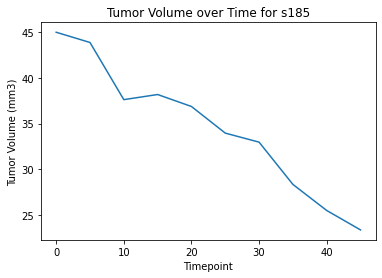

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_time_tumor = plt.plot(capo_mouse_time, capo_mouse_tumor,)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for s185")
plt.show()

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
